In [28]:
import pandas as pd
code = pd.read_csv('./data/corpgeneral.csv')

code = code[['회사명','종목코드']]

In [29]:
code =code.rename(columns={'회사명':'corp','종목코드':'code'})
code

,corp,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [30]:
corp_name = '카카오'
condition = "corp=='{}'" .format(corp_name)
kakao = code.query(condition) #이거 사용하면 되는구나 

kakao = kakao['code']
kakao_string = kakao.to_string(index = False)
kakao_string = kakao_string.strip()
kakao_string = kakao_string.rjust(6,'0') #빈자리는 0으로 채워주는 코드 
kakao_code = kakao_string
kakao_code

'035720'

In [31]:
conda install -c anaconda pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas_datareader.data as web
kakao_stock_df = web.DataReader(kakao_code,'naver') #네이버에서 데이터를 가져온다
kakao_stock_df

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-26,18585,18585,18344,18365,223967
2016-07-27,18305,18525,18284,18305,192058
2016-07-28,18344,18465,18204,18385,220576
2016-07-29,18365,18385,18245,18245,236131
2016-08-01,18365,18385,18184,18265,234983
...,...,...,...,...,...
2021-07-19,155500,155500,154000,154000,3475792
2021-07-20,151500,153000,149000,152000,6652856
2021-07-21,153000,155500,144500,145000,10409836


In [33]:
kakao_stock_df['Close'] = kakao_stock_df['Close'].astype(int)

<AxesSubplot:xlabel='Date'>

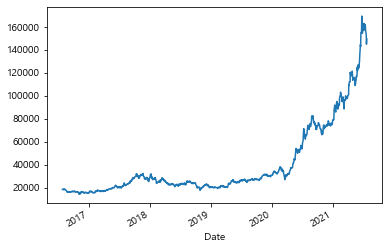

In [34]:
kakao_stock_df['Close'].plot()

In [35]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

In [36]:
code = pd.read_csv('./data/corpgeneral.csv',header = 0)
code = code[['회사명','종목코드']]
code = code.rename(columns = {'회사명':'corp','종목코드':'code'})

In [37]:
def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    code = code_result.query(condition)['code'].to_string(index = False)
    code = code.strip()
    code = code.rjust(6,"0")
    return code

companies = ['삼성전자','LG전자','카카오','NAVER','CJ','한화','현대자동차','기아자동차']
start =datetime(2020,1,1)
end = datetime(2020,12,31)

stock_company = pd.DataFrame({'Date':pd.date_range(start = start, end = end)})
stock_company


,Date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
361,2020-12-27
362,2020-12-28
363,2020-12-29
364,2020-12-30


In [38]:
for company in companies:
    company_code = get_code(code, company)
    stock_df = web.DataReader(company_code, 'naver',start,end)
    #계속 머지 시켜주는거
    stock_company = stock_company.join(pd.DataFrame(stock_df['Close'].astype(int)).rename(columns = {'Close':company}),on = 'Date')
    
stock_company.dropna()
stock_company.to_csv('./stock_change.csv',sep=',', na_rep='NaN',index = False)
    

In [19]:
stock_company

,Date,삼성전자,LG전자,카카오,NAVER,CJ,한화,현대자동차,기아자동차
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,55200.0,71000.0,30609.0,182500.0,93800.0,24350.0,118000.0,42500.0
2,2020-01-03,55500.0,71100.0,30609.0,181500.0,92600.0,24550.0,116000.0,42000.0
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2020-12-28,78700.0,124500.0,74867.0,281000.0,89300.0,27900.0,189500.0,62800.0
363,2020-12-29,78300.0,131500.0,77175.0,283000.0,91100.0,27850.0,190500.0,62300.0
364,2020-12-30,81000.0,135000.0,78179.0,292500.0,92100.0,28300.0,192000.0,62400.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False #마이너스 기호가 깨지는걸 막아준다 

<AxesSubplot:xlabel='Date', ylabel='Close'>

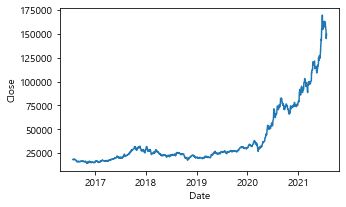

In [21]:
plt.figure(figsize = (5,3))
sns.lineplot(data = kakao_stock_df['Close'])

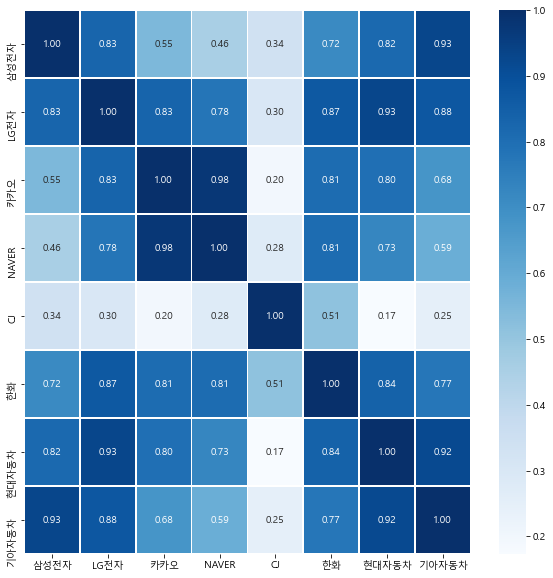

In [25]:
corr_data = stock_company.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_data, annot = True, fmt='.2f',linewidths=.5, cmap='Blues')
plt.show()